In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def autocorelation(data,max_lag = 200,allow_neg = 0):
    max_lag = int(max_lag)#ensure it is an integer
    var = np.var(data,ddof=1)
    a = data - np.mean(data)
    lags = np.arange(1, max_lag+1, 1, dtype=int)
    C = np.zeros(max_lag)
    for j in lags:
        to_av = a[:-j]*a[j:]
        C[j-1] = np.average(to_av)/var
    if not allow_neg:
        C[C<0] = 0
    tc = 1+2*np.sum(C)
    return lags, C, tc

In [3]:
with open('tau0.01', 'r') as file:
    # Read the entire file content
    data = file.read()

# Split the content into individual numbers (assuming they are separated by whitespace)
numbers = data.split()

# Convert the numbers to floats and create a NumPy array
E = np.array([float(num) for num in numbers])

In [4]:
E

array([-2.88329305, -2.88443536, -2.88783148, ..., -2.89738509,
       -2.8965723 , -2.89416301])

In [7]:
lags,corr, t_corr = autocorelation(E,max_lag=200,allow_neg = 0)
print('Correlation length = ', t_corr)

Correlation length =  45.02363977255378


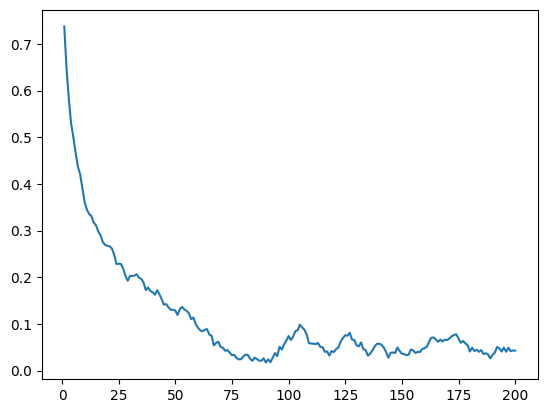

In [6]:
plt.plot(lags,corr)